In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,f1_score,precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier  
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler,SMOTE
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('../input/credit-card/application_data.csv')
df1 = df.copy()
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
df.isnull().sum().sort_values(ascending=False)

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
                             ...  
NAME_HOUSING_TYPE                0
NAME_FAMILY_STATUS               0
NAME_EDUCATION_TYPE              0
NAME_INCOME_TYPE                 0
SK_ID_CURR                       0
Length: 122, dtype: int64

In [6]:
null_counts = df.isnull().sum()

columns_with_less_than_500_null = null_counts[null_counts < 200].index

columns_with_more_than_500_null = null_counts[null_counts > 200].index

print("Columns with less than 500 null values:")
print(columns_with_less_than_500_null)

print("\nColumns with more than 500 null values:")
print(columns_with_more_than_500_null)

Columns with less than 500 null values:
Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCU

In [7]:
df = df.drop(columns_with_more_than_500_null, axis=1)

In [8]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df.isnull().sum().sort_values(ascending=False)


AMT_ANNUITY                    12
CNT_FAM_MEMBERS                 2
DAYS_LAST_PHONE_CHANGE          1
SK_ID_CURR                      0
FLAG_DOCUMENT_7                 0
LIVE_REGION_NOT_WORK_REGION     0
REG_CITY_NOT_LIVE_CITY          0
REG_CITY_NOT_WORK_CITY          0
LIVE_CITY_NOT_WORK_CITY         0
ORGANIZATION_TYPE               0
FLAG_DOCUMENT_2                 0
FLAG_DOCUMENT_3                 0
FLAG_DOCUMENT_4                 0
FLAG_DOCUMENT_5                 0
FLAG_DOCUMENT_6                 0
FLAG_DOCUMENT_8                 0
REG_REGION_NOT_LIVE_REGION      0
FLAG_DOCUMENT_9                 0
FLAG_DOCUMENT_10                0
FLAG_DOCUMENT_11                0
FLAG_DOCUMENT_12                0
FLAG_DOCUMENT_13                0
FLAG_DOCUMENT_14                0
FLAG_DOCUMENT_15                0
FLAG_DOCUMENT_16                0
FLAG_DOCUMENT_17                0
FLAG_DOCUMENT_18                0
FLAG_DOCUMENT_19                0
FLAG_DOCUMENT_20                0
REG_REGION_NOT

In [10]:
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i].fillna(df[i].mode()[0], inplace=True)
    else:
        df[i].fillna(df[i].median(), inplace=True)
print(df)

        SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0     

In [11]:
df.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION

In [12]:
numerical= df.select_dtypes('number').columns

categorical = df.select_dtypes('object').columns

print(f'Numerical Columns:  {df[numerical].columns}')
print('\n')
print(f'Categorical Columns: {df[categorical].columns}')

Numerical Columns:  Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16

In [13]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
for name in df[categorical].columns:
    
    df[name]= label_encoder.fit_transform(df[name])
    print(df[name])

0         0
1         0
2         1
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    0
307510    0
Name: NAME_CONTRACT_TYPE, Length: 307511, dtype: int64
0         1
1         0
2         1
3         0
4         1
         ..
307506    1
307507    0
307508    0
307509    0
307510    0
Name: CODE_GENDER, Length: 307511, dtype: int64
0         0
1         0
2         1
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    0
307510    0
Name: FLAG_OWN_CAR, Length: 307511, dtype: int64
0         1
1         0
2         1
3         1
4         1
         ..
307506    0
307507    1
307508    1
307509    1
307510    0
Name: FLAG_OWN_REALTY, Length: 307511, dtype: int64
0         7
1         4
2         7
3         7
4         7
         ..
307506    7
307507    3
307508    7
307509    1
307510    1
Name: NAME_INCOME_TYPE, Length: 307511, dtype: int64
0         4
1         1
2         4
3         4
4         4
         ..
307506    4

In [14]:
df.select_dtypes('int').describe()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.095213,0.341669,0.340108,0.693673,0.417052,4.670288,3.188273,1.472312,...,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335
std,102790.175348,0.272419,0.293509,0.474297,0.473746,0.460968,0.722121,2.544525,1.298753,1.168884,...,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299
min,100002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,7.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,367142.500000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,7.000000,4.000000,2.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,456255.000000,1.000000,1.000000,2.000000,1.000000,1.000000,19.000000,7.000000,4.000000,5.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


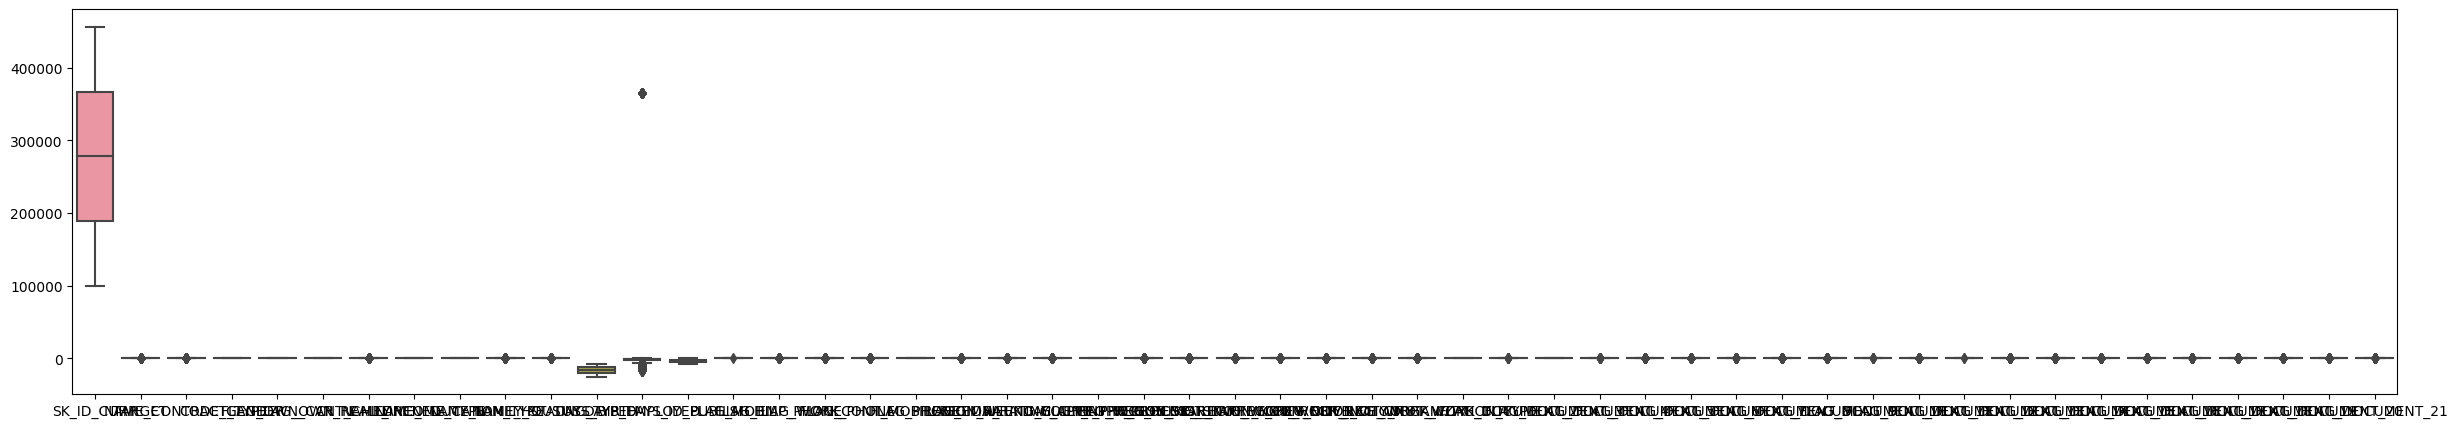

In [15]:
plt.figure(figsize=(30,5))
sns.boxplot(data=df.select_dtypes('int'))
plt.show()

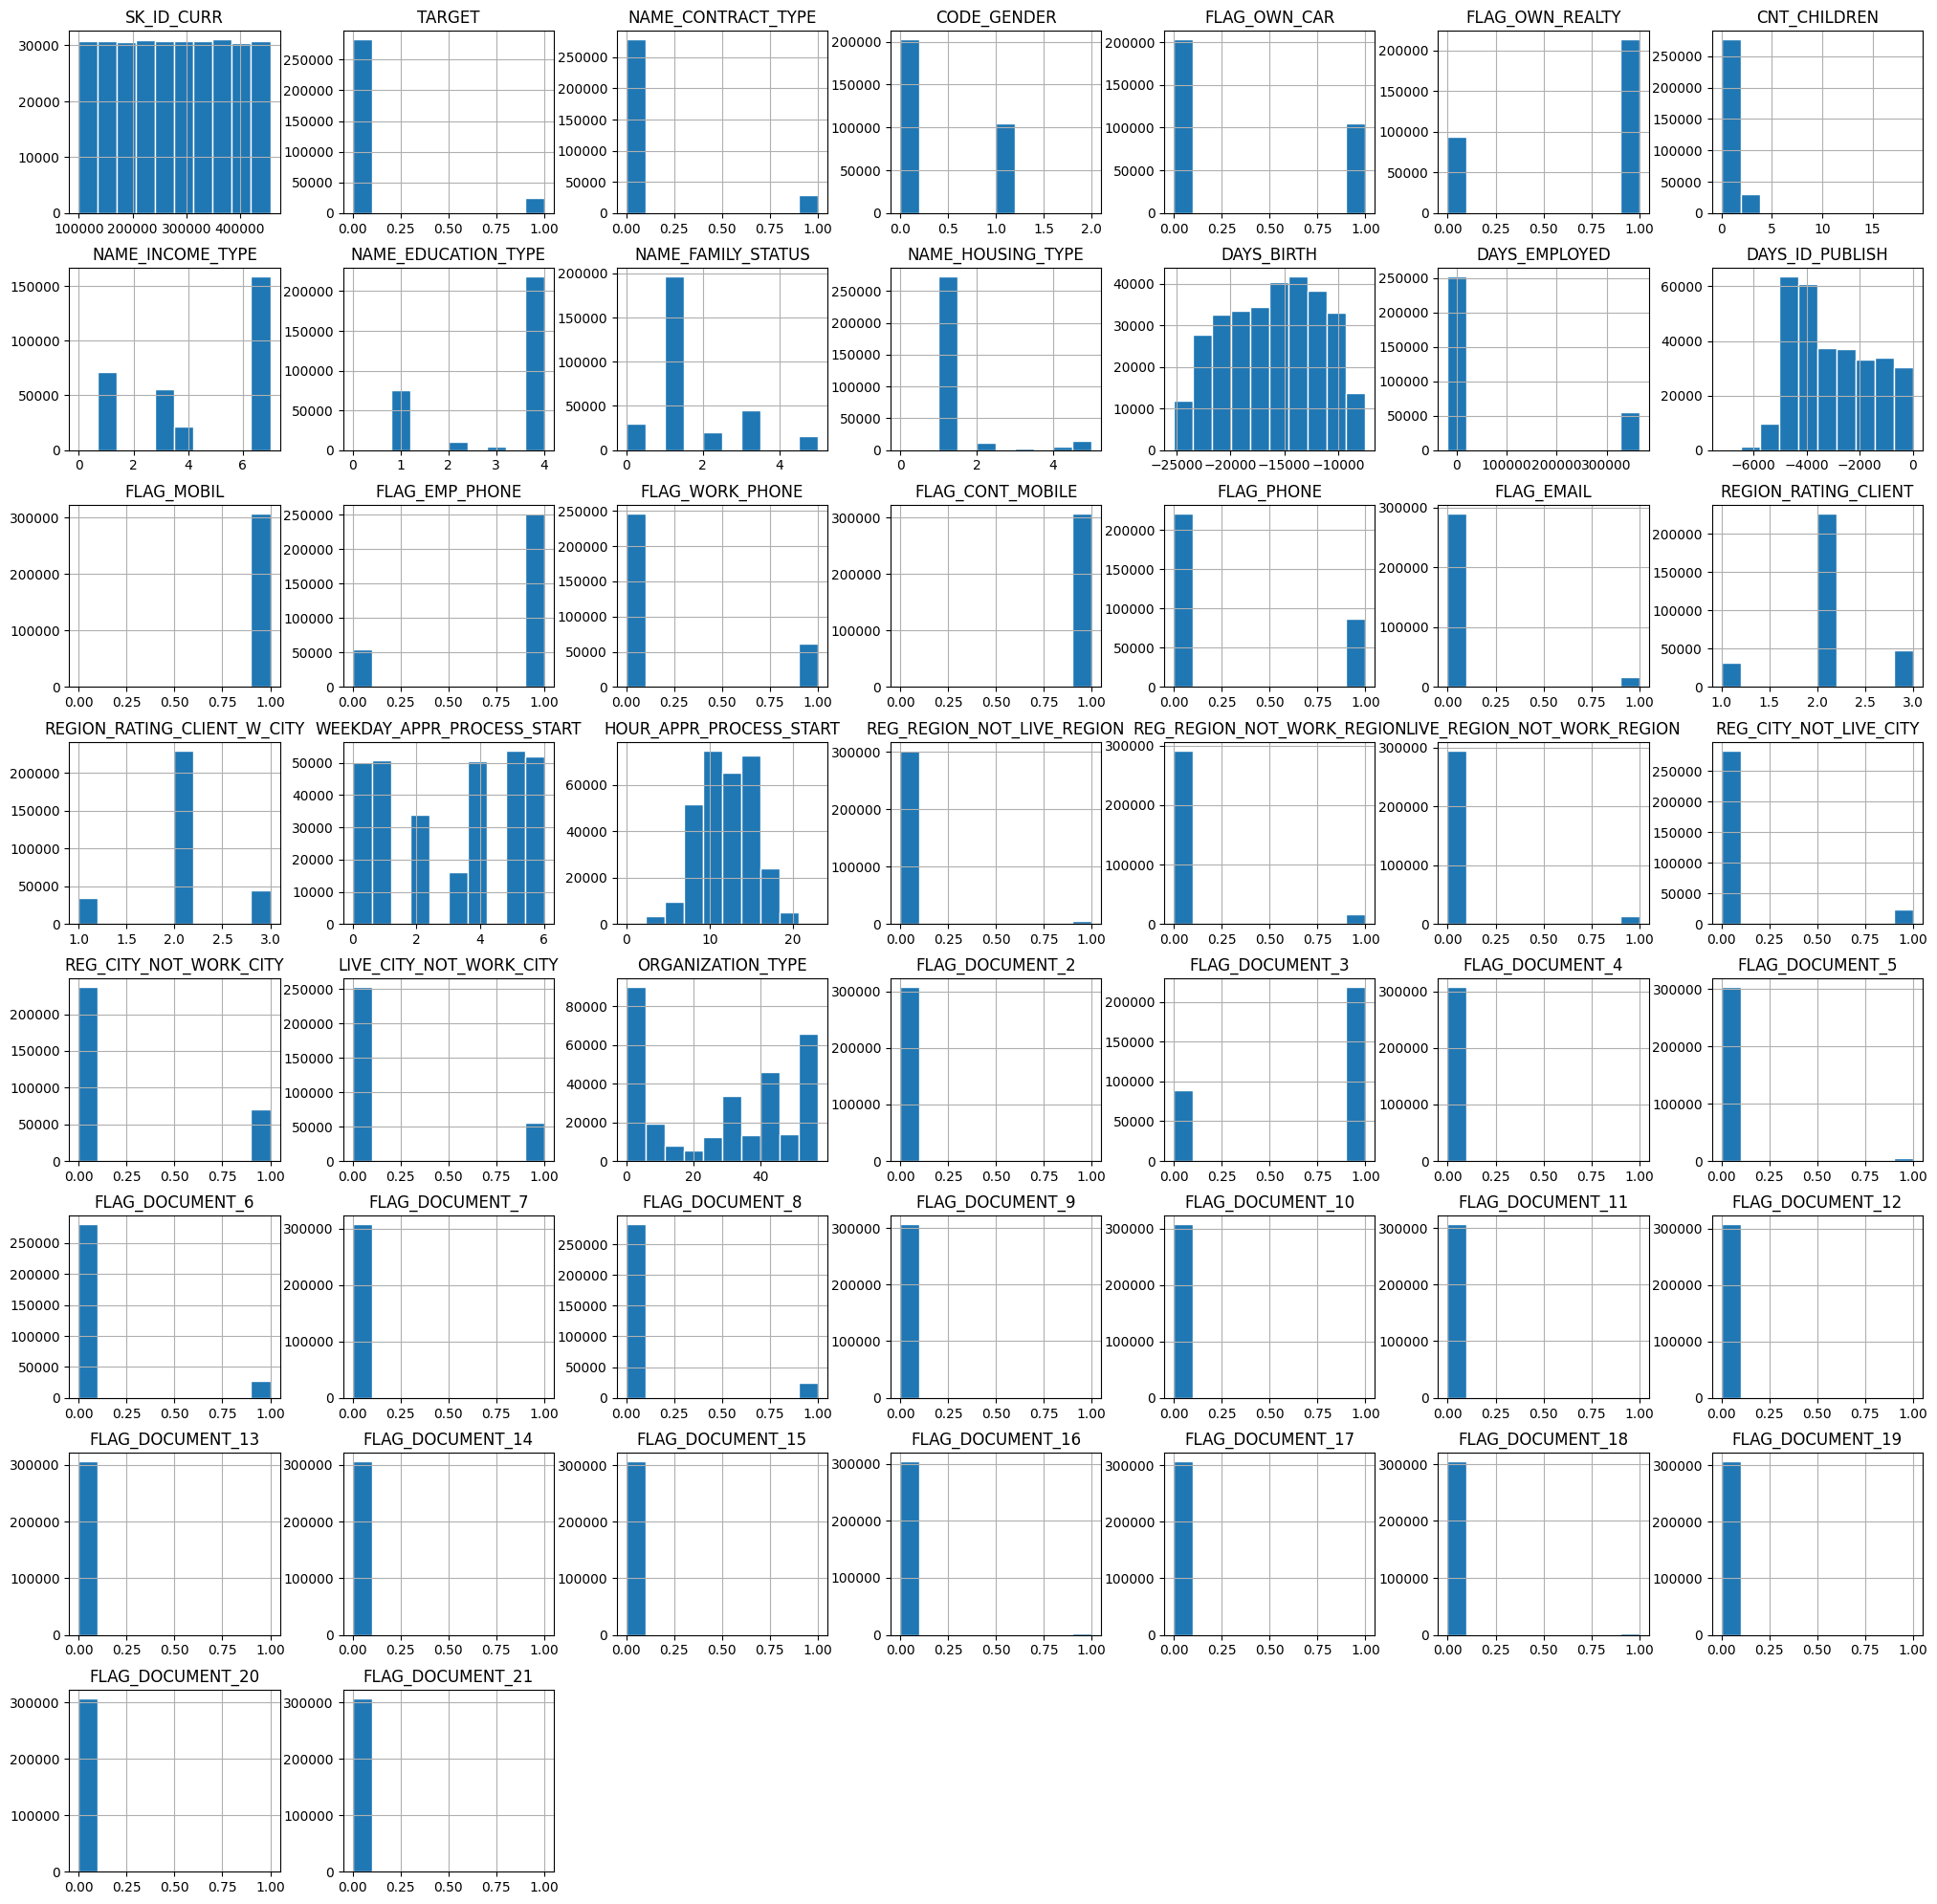

In [16]:
df.select_dtypes('int').hist(figsize=(25,25), ec='w')
plt.show()

In [17]:
def color_(value):
    if value < 0 :
        color = 'red'
    elif value == 1 :
        color = 'blue'
    else:
        color = 'green'
    return 'color: %s' % color
df.select_dtypes('int').corr().style.applymap(color_)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
SK_ID_CURR,1.000000,-0.002108,0.001654,-0.000769,0.001216,0.000703,-0.001129,-0.002112,-0.000529,0.002846,0.002191,-0.001500,0.001366,-0.000384,0.002804,-0.001337,-0.000415,0.002815,0.002753,0.000281,-0.001075,-0.001138,0.002185,0.000350,-0.000283,0.001097,0.002903,-0.001885,-0.001582,0.000067,0.002269,0.000700,-0.003411,-0.004139,-0.001097,0.002121,-0.002694,0.001809,0.001505,-0.000815,-0.002012,-0.001045,0.000896,-0.001077,0.002604,-0.000724,0.001450,0.000509,0.000167,0.001073,0.000282
TARGET,-0.002108,1.000000,-0.030896,0.054692,-0.021851,-0.006148,0.019187,0.046829,0.054699,-0.004127,0.034489,0.078239,-0.044932,0.051457,0.000534,0.045982,0.028524,0.000370,-0.023806,-0.001758,0.058899,0.060893,0.004002,-0.024166,0.005576,0.006942,0.002819,0.044395,0.050994,0.032518,-0.030765,0.005417,0.044346,-0.002672,-0.000316,-0.028602,-0.001520,-0.008040,-0.004352,-0.001414,-0.004229,-0.000756,-0.011583,-0.009464,-0.006536,-0.011615,-0.003378,-0.007952,-0.001358,0.000215,0.003709
NAME_CONTRACT_TYPE,0.001654,-0.030896,1.000000,-0.008613,0.004022,0.067177,0.029998,0.005428,-0.065086,0.011272,0.024190,0.086364,-0.054450,0.052847,0.000585,0.054938,-0.033647,-0.097116,-0.021378,-0.010811,-0.021593,-0.023116,-0.006925,0.035897,0.018561,0.015774,0.007941,0.013586,0.004487,-0.004999,-0.040187,-0.002109,-0.479724,0.004448,0.029372,-0.098808,0.042703,-0.084961,-0.006592,0.014708,0.025995,-0.000827,-0.004900,0.000005,-0.007783,-0.023433,-0.000548,-0.007530,-0.005190,-0.007308,0.055821
CODE_GENDER,-0.000769,0.054692,-0.008613,1.000000,0.345833,-0.044340,0.047403,0.065089,0.009554,-0.099713,0.058767,0.148080,-0.156018,0.000130,-0.002503,0.157253,0.034030,-0.006017,-0.019429,0.018218,-0.017862,-0.017263,-0.000271,0.007177,0.023683,0.103437,0.106060,0.048237,0.137541,0.133239,-0.163879,-0.001520,-0.087338,-0.002693,0.003255,-0.100766,-0.002059,0.249767,-0.008070,0.000874,0.004830,0.000851,0.040447,0.000947,0.020888,0.000061,0.003772,0.022205,0.004632,0.003258,0.023908
FLAG_OWN_CAR,0.001216,-0.021851,0.004022,0.345833,1.000000,-0.002817,0.102023,0.033186,-0.093977,-0.131014,-0.004041,0.129879,-0.154441,0.013661,-0.002512,0.154659,0.011471,-0.006644,-0.007588,0.032105,-0.022668,-0.021405,0.002346,0.014369,-0.000668,0.038937,0.046352,0.003123,0.076081,0.088061,-0.114162,-0.000445,-0.070000,-0.001144,-0.013661,-0.106012,0.000958,0.228368,-0.011069,0.000891,-0.000456,0.003552,0.080647,0.003410,0.045909,0.001984,-0.002476,-0.000097,0.002184,0.007299,0.006741
FLAG_OWN_REALTY,0.000703,-0.006148,0.067177,-0.044340,-0.002817,1.000000,-0.002366,-0.026539,0.022130,0.000521,-0.199722,-0.119146,0.069677,0.006664,-0.001198,-0.070021,-0.114043,0.008526,-0.041507,0.029247,0.001289,0.001884,-0.003414,-0.102687,-0.036301,-0.032316,-0.018324,-0.061709,-0.061889,-0.035991,0.050389,0.003236,-0.036839,0.002080,-0.011922,0.041567,0.003093,-0.035077,-0.003513,0.003171,-0.035201,-0.001071,-0.057484,-0.054678,-0.035729,-0.092272,-0.014207,-0.087687,-0.019364,-0.025130,-0.000173
CNT_CHILDREN,-0.001129,0.019187,0.029998,0.047403,0.102023,-0.002366,1.000000,0.102547,-0.034128,-0.165475,0.021737,0.330938,-0.2

In [18]:
# Tính ma trận tương quan giữa các cột và cột TARGET
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['TARGET'].abs().sort_values(ascending=False)



In [19]:
# Lấy 20 cột có độ tương quan cao nhất bao gồm cột TARGET
top_30_correlated_columns = correlation_with_target[:25].index

# Tạo DataFrame mới từ danh sách cột này
df_top_30_correlated = df[top_30_correlated_columns]

In [20]:
df_top_30_correlated.shape

(307511, 25)

In [21]:
df1 = df_top_30_correlated

In [22]:
df1.shape

(307511, 25)

In [23]:
df1.head()

,TARGET,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_LAST_PHONE_CHANGE,NAME_EDUCATION_TYPE,CODE_GENDER,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY,NAME_INCOME_TYPE,...,REGION_POPULATION_RELATIVE,NAME_HOUSING_TYPE,LIVE_CITY_NOT_WORK_CITY,NAME_CONTRACT_TYPE,ORGANIZATION_TYPE,AMT_CREDIT,FLAG_DOCUMENT_6,FLAG_WORK_PHONE,HOUR_APPR_PROCESS_START,FLAG_PHONE
0,1,-9461,2,2,-1134.0,4,1,-2120,0,7,...,0.018801,1,0,0,5,406597.5,0,0,10,1
1,0,-16765,1,1,-828.0,1,0,-291,0,4,...,0.003541,1,0,0,39,1293502.5,0,0,11,1
2,0,-19046,2,2,-815.0,4,1,-2531,0,7,...,0.010032,1,0,1,11,135000.0,0,1,9,1
3,0,-19005,2,2,-617.0,4,0,-2437,0,7,...,0.008019,1,0,0,5,312682.5,0,0,17,0
4,0,-19932,2,2,-1106.0,4,1,-3458,1,7,...,0.028663,1,1,0,37,513000.0,0,0,11,0


In [24]:
# Hàm normalize theo phương pháp Min-Max Scaling
def min_max_scaling(column):
    return (column - column.min()) / (column.max() - column.min())

# Áp dụng hàm normalize cho từng cột trong DataFrame
df_normalized = df1.apply(min_max_scaling)

# Xem dữ liệu sau khi được normalize
print(df_normalized.head())

   TARGET  DAYS_BIRTH  REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT  \
0     1.0    0.888839                          0.5                   0.5   
1     0.0    0.477114                          0.0                   0.0   
2     0.0    0.348534                          0.5                   0.5   
3     0.0    0.350846                          0.5                   0.5   
4     0.0    0.298591                          0.5                   0.5   

   DAYS_LAST_PHONE_CHANGE  NAME_EDUCATION_TYPE  CODE_GENDER  DAYS_ID_PUBLISH  \
0                0.735788                 1.00          0.5         0.705433   
1                0.807083                 0.25          0.0         0.959566   
2                0.810112                 1.00          0.5         0.648326   
3                0.856244                 1.00          0.0         0.661387   
4                0.742311                 1.00          0.5         0.519522   

   REG_CITY_NOT_WORK_CITY  NAME_INCOME_TYPE  ...  REGION_POPUL

In [25]:
df1.select_dtypes('int').cov().style.applymap(color_)

,TARGET,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,NAME_EDUCATION_TYPE,CODE_GENDER,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY,NAME_INCOME_TYPE,FLAG_EMP_PHONE,DAYS_EMPLOYED,REG_CITY_NOT_LIVE_CITY,FLAG_DOCUMENT_3,NAME_HOUSING_TYPE,LIVE_CITY_NOT_WORK_CITY,NAME_CONTRACT_TYPE,ORGANIZATION_TYPE,FLAG_DOCUMENT_6,FLAG_WORK_PHONE,HOUR_APPR_PROCESS_START,FLAG_PHONE
TARGET,0.074212,93.013383,0.008340,0.008168,0.019353,0.007067,21.159315,0.005850,0.032461,0.004814,-1729.246843,0.003247,0.005482,0.008937,0.003400,-0.002470,-0.171506,-0.002208,0.003105,-0.021500,-0.002915
DAYS_BIRTH,93.013383,19044396.778354,17.712735,20.793917,-860.094266,306.500272,1796274.604283,445.480226,2108.746158,1039.548207,-379696190.460693,211.315113,217.158095,967.447346,266.122948,110.620534,-35301.700612,-503.514317,300.683368,1297.854085,-83.179638
REGION_RATING_CLIENT_W_CITY,0.008340,17.712735,0.252745,0.243330,0.046756,-0.004116,-5.871592,0.005945,0.155299,-0.006706,2459.141436,0.006163,0.015303,0.008687,-0.000541,-0.003411,0.692725,0.002831,0.002694,-0.434788,-0.017884
REGION_RATING_CLIENT,0.008168,20.793917,0.243330,0.259116,0.045331,-0.004313,-3.921112,0.001792,0.169638,-0.006430,2355.208443,0.004884,0.014442,0.009782,-0.003742,-0.003226,0.664360,0.003019,0.001495,-0.474951,-0.019181
NAME_EDUCATION_TYPE,0.019353,-860.094266,0.046756,0.045331,1.686761,0.005885,-80.502161,0.010161,0.291799,-0.057531,21095.884041,-0.006640,0.035857,-0.021087,0.015465,-0.024810,2.469204,0.027563,-0.003781,-0.379310,-0.018057
CODE_GENDER,0.007067,306.500272,-0.004116,-0.004313,0.005885,0.224958,0.093027,0.027472,0.078553,0.028661,-10454.244961,0.006142,-0.018796,0.026512,0.024255,-0.001199,-1.590583,-0.013543,0.006448,0.011118,-0.004142
DAYS_ID_PUBLISH,21.159315,1796274.604283,-5.871592,-3.921112,-80.502161,0.093027,2278440.567428,63.156146,285.203396,158.708853,-58084280.383992,30.927488,34.457608,114.603228,35.395021,23.413132,-5153.094023,-76.258727,27.719157,156.151994,-25.553165
REG_CITY_NOT_WORK_CITY,0.005850,445.480226,0.005945,0.001792,0.010161,0.027472,63.156146,0.177345,0.109576,0.041498,-15144.888706,0.049787,0.010753,0.041130,0.133441,0.000555,-1.599478,-0.018790,0.020358,0.029575,-0.008654
NAME_INCOME_TYPE,0.032461,2108.746158,0.155299,0.169638,0.291799,0.078553,285.203396,0.109576,6.474607,0.300568,-110623.075610,0.007284,0.152737,0.086705,0.100459,0.004054,-9.176095,-0.131446,0.139914,-0.246593,-0.011371
FLAG_EMP_PHONE,0.004814,1039.548207,-0.006706,-0.006430,-0.057531,0.028661,158.708853,0.041498,0.300568,0.147671,-54276.179362,0.009508,0.043336,0.038807,0.032333,0.006196,-4.960744,-0.065090,0.035895,0.114652,-0.002786


In [26]:
def color_(value):
    if value < 0 :
        color = 'red'
    elif value == 1 :
        color = 'blue'
    else:
        color = 'green'
    return 'color: %s' % color
df1.select_dtypes('int').corr().style.applymap(color_)

,TARGET,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,NAME_EDUCATION_TYPE,CODE_GENDER,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY,NAME_INCOME_TYPE,FLAG_EMP_PHONE,DAYS_EMPLOYED,REG_CITY_NOT_LIVE_CITY,FLAG_DOCUMENT_3,NAME_HOUSING_TYPE,LIVE_CITY_NOT_WORK_CITY,NAME_CONTRACT_TYPE,ORGANIZATION_TYPE,FLAG_DOCUMENT_6,FLAG_WORK_PHONE,HOUR_APPR_PROCESS_START,FLAG_PHONE
TARGET,1.000000,0.078239,0.060893,0.058899,0.054699,0.054692,0.051457,0.050994,0.046829,0.045982,-0.044932,0.044395,0.044346,0.034489,0.032518,-0.030896,-0.030765,-0.028602,0.028524,-0.024166,-0.023806
DAYS_BIRTH,0.078239,1.000000,0.008073,0.009361,-0.151752,0.148080,0.272691,0.242401,0.189904,0.619888,-0.615864,0.180382,0.109666,0.233070,0.158882,0.086364,-0.395304,-0.407160,0.172457,0.091064,-0.042402
REGION_RATING_CLIENT_W_CITY,0.060893,0.008073,1.000000,0.950842,0.071610,-0.017263,-0.007737,0.028081,0.121400,-0.034712,0.034624,0.045669,0.067083,0.018166,-0.002805,-0.023116,0.067335,0.019870,0.013414,-0.264815,-0.079134
REGION_RATING_CLIENT,0.058899,0.009361,0.950842,1.000000,0.068567,-0.017862,-0.005103,0.008360,0.130969,-0.032871,0.032750,0.035741,0.062528,0.020204,-0.019154,-0.021593,0.063779,0.020930,0.007349,-0.285699,-0.083827
NAME_EDUCATION_TYPE,0.054699,-0.151752,0.071610,0.068567,1.000000,0.009554,-0.041064,0.018578,0.088298,-0.115273,0.114975,-0.019046,0.060846,-0.017070,0.031023,-0.065086,0.092907,0.074893,-0.007286,-0.089428,-0.030929
CODE_GENDER,0.054692,0.148080,-0.017263,-0.017862,0.009554,1.000000,0.000130,0.137541,0.065089,0.157253,-0.156018,0.048237,-0.087338,0.058767,0.133239,-0.008613,-0.163879,-0.100766,0.034030,0.007177,-0.019429
DAYS_ID_PUBLISH,0.051457,0.272691,-0.007737,-0.005103,-0.041064,0.000130,1.000000,0.099354,0.074256,0.273611,-0.272378,0.076326,0.050309,0.079822,0.061094,0.052847,-0.166828,-0.178282,0.045964,0.031676,-0.037660
REG_CITY_NOT_WORK_CITY,0.050994,0.242401,0.028081,0.008360,0.018578,0.137541,0.099354,1.000000,0.102258,0.256427,-0.254559,0.440409,0.056275,0.102682,0.825575,0.004487,-0.185604,-0.157457,0.121000,0.021504,-0.045717
NAME_INCOME_TYPE,0.046829,0.189904,0.121400,0.130969,0.088298,0.065089,0.074256,0.102258,1.000000,0.307389,-0.307731,0.010664,0.132288,0.035824,0.102862,0.005428,-0.176226,-0.182297,0.137629,-0.029674,-0.009941
FLAG_EMP_PHONE,0.045982,0.619888,-0.034712,-0.032871,-0.115273,0.157253,0.273611,0.256427,0.307389,1.000000,-0.999755,0.092166,0.248534,0.106171,0.219219,0.054938,-0.630838,-0.597732,0.233801,0.091356,-0.016131


In [27]:
X = df1.drop(['TARGET'],axis = 1)
target = df1['TARGET']
X_train, X_test, Y_train, Y_test = train_test_split(X, target, test_size= 0.2, random_state = 42)

In [28]:
count_ones = sum(Y_test == 1)
print(count_ones)

4949


In [29]:
count_zero = sum(Y_test == 0)
print(count_zero)

56554


In [30]:
print(Y_test)

245895    0
98194     0
36463     0
249923    0
158389    0
         ..
256564    0
278889    0
221828    0
190245    0
253004    0
Name: TARGET, Length: 61503, dtype: int64


In [31]:
df1.shape

(307511, 25)

In [32]:
print('before Oversampling:',Counter(Y_train))
oversample = RandomOverSampler(sampling_strategy='minority')
X_train1, Y_train1 = oversample.fit_resample(X_train, Y_train)
print('After Oversampling:',Counter(Y_train1))

before Oversampling: Counter({0: 226132, 1: 19876})
After Oversampling: Counter({0: 226132, 1: 226132})


In [33]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [34]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [35]:

# Khởi tạo và huấn luyện mô hình XGBoost
model = xgb.XGBClassifier()
model.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [55]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Dự đoán xác suất trên tập kiểm thử
proba = model.predict_proba(X_train)[:, 1]

# Thiết lập ngưỡng (threshold), ví dụ: 0.5
threshold = 0.1

# Chuyển đổi xác suất thành dự đoán nhãn dựa trên ngưỡng
Y_pred = (proba > threshold).astype(int)

# Tính các độ đo
accuracy = accuracy_score(Y_train, Y_pred)
precision = precision_score(Y_train, Y_pred)
recall = recall_score(Y_train, Y_pred)
#f1 = f1_score(Y_test, Y_pred)

# In các độ đo
# In các độ đo trên 1 hàng
print("Accuracy: {:.2f}%, Precision: {:.2f}%, Recall: {:.2f}%".format(
    accuracy * 100, precision * 100, recall * 100))


# In confusion matrix
cm = confusion_matrix(Y_train, Y_pred)
print("Confusion Matrix:")
print(cm)


Accuracy: 75.04%, Precision: 18.90%, Recall: 62.99%
Confusion Matrix:
[[150514  47258]
 [  6472  11013]]


In [60]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Dự đoán xác suất trên tập kiểm thử
proba = model.predict_proba(X_test)[:, 1]

# Thiết lập ngưỡng (threshold), ví dụ: 0.5
threshold = 0.1

# Chuyển đổi xác suất thành dự đoán nhãn dựa trên ngưỡng
Y_pred = (proba > threshold).astype(int)

# Tính các độ đo
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

# In các độ đo
# In các độ đo trên 1 hàng
print("Accuracy: {:.2f}%, Precision: {:.2f}%, Recall: {:.2f}%,f1: {:.2f}%".format(
    accuracy * 100, precision * 100, recall * 100,f1 *100))


# In confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(cm)


Accuracy: 75.21%, Precision: 18.62%, Recall: 62.75%,f1: 28.72%
Confusion Matrix:
[[64782 20132]
 [ 2734  4606]]


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Đảm bảo df1 và df là DataFrame của bạn
X = df1.drop(['TARGET'], axis=1)
target = df1['TARGET']
X_train, X_test, Y_train, Y_test = train_test_split(X, target, test_size=0.3, random_state=0)



# Khởi tạo và huấn luyện mô hình Random Forest
model_rf = RandomForestClassifier()
model_rf.fit(X_train1, Y_train1)




RandomForestClassifier()

In [63]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Dự đoán xác suất trên tập kiểm thử
proba = model_rf.predict_proba(X_test)[:, 1]

# Thiết lập ngưỡng (threshold), ví dụ: 0.5
threshold = 0.15

# Chuyển đổi xác suất thành dự đoán nhãn dựa trên ngưỡng
Y_pred = (proba > threshold).astype(int)

# Tính các độ đo
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

# In các độ đo
# In các độ đo trên 1 hàng
print("Accuracy: {:.2f}%, Precision: {:.2f}%, Recall: {:.2f}%,f1: {:.2f}%".format(
    accuracy * 100, precision * 100, recall * 100,f1 *100))


# In confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(cm)


Accuracy: 94.04%, Precision: 58.23%, Recall: 88.90%,f1: 70.37%
Confusion Matrix:
[[80233  4681]
 [  815  6525]]


In [41]:
# In ra 10 thuộc tính quan trọng nhất của mô hình Random Forest
feature_importances = model_rf.feature_importances_

# Sắp xếp theo độ quan trọng giảm dần
sorted_idx = feature_importances.argsort()[::-1]

# Chọn ra 10 thuộc tính quan trọng nhất
top_features = X.columns[sorted_idx][:10]

# In ra kết quả
print("Top 10 Important Features:")
for i, feature in enumerate(top_features, 1):
    print(f"{i}. {feature}: {feature_importances[sorted_idx[i-1]]:.4f}")


Top 10 Important Features:
1. DAYS_BIRTH: 0.1170
2. DAYS_ID_PUBLISH: 0.1112
3. DAYS_REGISTRATION: 0.1077
4. AMT_CREDIT: 0.1074
5. DAYS_LAST_PHONE_CHANGE: 0.1047
6. DAYS_EMPLOYED: 0.0976
7. REGION_POPULATION_RELATIVE: 0.0806
8. HOUR_APPR_PROCESS_START: 0.0674
9. ORGANIZATION_TYPE: 0.0562
10. NAME_EDUCATION_TYPE: 0.0204
